# BACQUET Maxime et CARON Mathieu

# TP1a - Génération de variables aléatoires (Première partie)

## Estimation avancée - G3 SDIA

Dans ce TP, on s'intéresse à la génération de variables aléatoires, i.e., la capacité de produire des échantillons finis de variables ou vecteurs aléatoires d'une loi donnée. On suppose que l'on dispose d'un générateur de loi uniforme sur $[0,1]$ (avec Numpy, il est donné par $\texttt{np.random.rand}$). À partir de ce générateur, le but de ce TP sera de générer des échantillons d'autres lois, avec des méthodes simples, notamment la méthode de la *transformée inverse*. Des méthodes plus sophistiquées (acceptation-rejet, échantillonnage d'importance) seront présentées et étudiées à la séance suivante (après les vacances). Ce sera le sujet du TP-1b.

Pour chaque question, justifier la solution puis l'implémenter. Comparer avec la densité théorique à l'aide d'histogrammes ou de *kernel density estimates*.

### Instructions

1. Renommer votre notebook sous la forme `tp1a_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 8 Novembre 2023, 23h59.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

### Partie 1 - Pour s'échauffer : lois uniformes

**Q1**. À partir de $N$ échantillons d'une loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillons d'une loi uniforme sur l'intervalle $[a,b]$ ?


Pour obtenir des échantillons d'une loi uniforme sur l'intervalle $[a, b]$ à partir de $N$ échantillons d'une loi uniforme sur l'intervalle $[0, 1]$, on peut utiliser la formule suivante :

$$X = a + (b - a) \cdot U$$

Où :

- $U$ est un échantillon d'une loi uniforme sur $[0, 1]$ (on peut l'avoir avec `np.random.rand()`)
- $X$ sera un échantillon d'une loi uniforme sur $[a, b]$


In [3]:
def uniforme_ab(a, b, N):
    # On génère N échantillons de la loi uniforme sur [0, 1]
    U = np.random.rand(N)
    # On transforme les échantillons en une loi uniforme sur [a, b]
    X = a + (b - a) * U
    return X


On peut prendre un exemple pour illustrer :

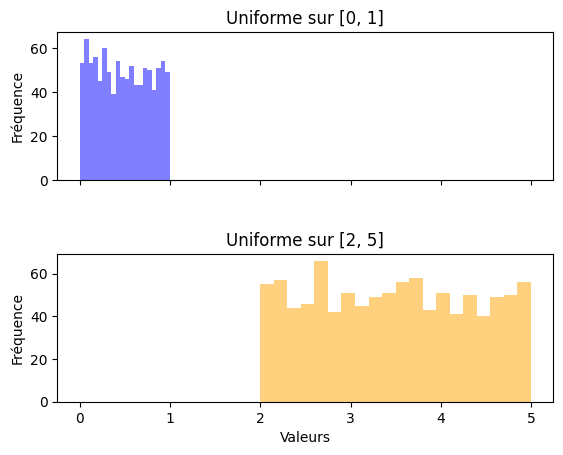

In [11]:
# Paramètres de l'exemple
a = 2
b = 5
N = 1000

# On générer les échantillons uniformes sur [0, 1] et sur [a, b]
U_01 = np.random.rand(N)
U_ab = uniforme_ab(a, b, N)

# On va afficher avec des histogramme
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.5})

# Uniforme sur [0, 1]
axs[0].hist(U_01, bins=20, alpha=0.5, color='blue')
axs[0].set_ylabel('Fréquence')
axs[0].set_title('Uniforme sur [0, 1]')

# Uniforme sur [a, b]
axs[1].hist(U_ab, bins=20, alpha=0.5, color='orange')
axs[1].set_xlabel('Valeurs')
axs[1].set_ylabel('Fréquence')
axs[1].set_title(f'Uniforme sur [{a}, {b}]')

plt.savefig("img/loi-uniforme-histogramme-ab.png")

plt.show()

On observe qu'on a bien réussi à obtenir $N$ échantillons d'une loi uniforme sur l'intervalle $[a,b]$. On peut le voir avec une autre représentation : le diagramme en violon qui permet de représenter la distribution avec des courbes de densité.

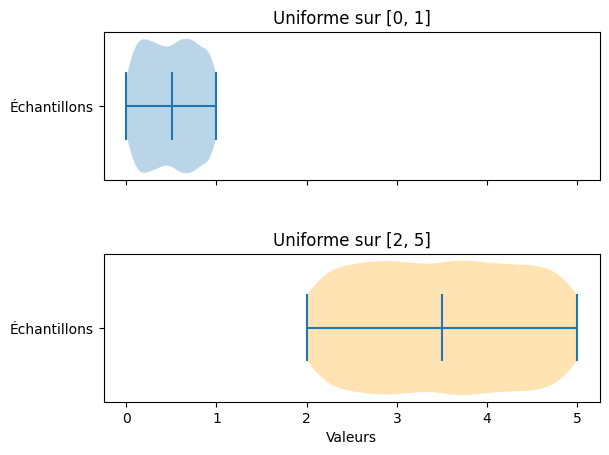

In [10]:
# On va afficher avec des diagrammes en violon
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.5})

# Diagramme en violon pour Uniforme sur [0, 1]
axs[0].violinplot([U_01], vert=False, showmedians=True, showextrema=True)
axs[0].set_title('Uniforme sur [0, 1]')
axs[0].set_yticks([1])
axs[0].set_yticklabels(['Échantillons'])

# Diagramme en violon pour Uniforme sur [a, b]
axs[1].violinplot([U_ab], vert=False, showmedians=True, showextrema=True)
axs[1].set_title(f'Uniforme sur [{a}, {b}]')
axs[1].set_xlabel('Valeurs')
axs[1].set_yticks([1])
axs[1].set_yticklabels(['Échantillons'])

# On met juste le second diagramme en orange
for pc in axs[1].collections:
    pc.set_facecolor('orange')

plt.savefig("img/loi-uniforme-diag-violon-ab.png")
plt.show()

On peut donc faire la même conclusion !

**Q2**. Comment obtenir $N$ échantillons d'une loi uniforme sur le pavé $[a,b] \times [c,d]$ ?

Pour obtenir des échantillons d'une loi uniforme sur le pavé $[a, b] \times [c, d]$ à partir de $N$ échantillons d'une loi uniforme sur l'intervalle $[0, 1]$, on peut faire de la même façon que le question prédécente ie :

1. Générer deux ensembles d'échantillons $U_1$ et $U_2$ à l'aide de `np.random.rand(N)` pour obtenir $N$ échantillons de lois uniformes sur $[0, 1]$.

2. Utiliser les formules suivantes pour obtenir les échantillons sur le pavé $[a, b] \times [c, d]$ :

   $$
   X = a + (b - a) \cdot U_1
   $$
   $$
   Y = c + (d - c) \cdot U_2
   $$

   Où :
   - $X$ sera un échantillon d'une loi uniforme sur $[a, b]$
   - $Y$ sera un échantillon d'une loi uniforme sur $[c, d]$

Ainsi, $N$ paires $(X, Y)$ seront des échantillons d'une loi uniforme sur le pavé $[a, b] \times [c, d]$.


In [12]:
def uniforme_pave(a, b, c, d, N):
    # On génère N échantillons de la loi uniforme sur [0, 1] pour X
    U1 = np.random.rand(N)  
    # On génère N échantillons de la loi uniforme sur [0, 1] pour Y
    U2 = np.random.rand(N)
    
    # On transforme les échantillons en une loi uniforme sur [a, b] pour X
    X = a + (b - a) * U1
    # On transforme les échantillons en une loi uniforme sur [c, d] pour Y
    Y = c + (d - c) * U2
    
    return X, Y

De la même façon, on peut prendre un exemple pour illustrer :

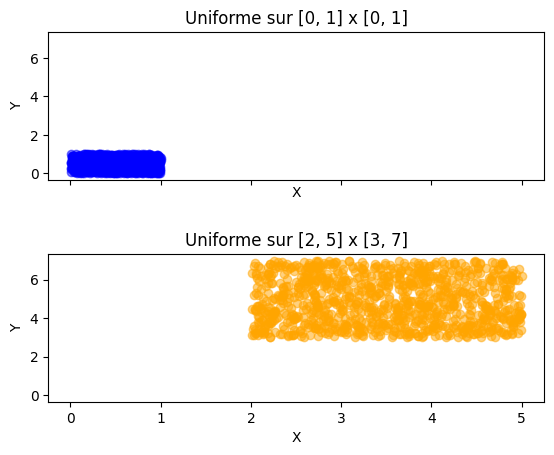

In [16]:
# Paramètres de l'exemple
a = 2
b = 5
c = 3
d = 7
N = 1000

# On génére les échantillons uniformes sur [0, 1] x [0, 1]
X1 = np.random.rand(N)
Y1 = np.random.rand(N)

X2, Y2 = uniforme_pave(a, b, c, d, N)

# On va afficher avec des scatter plot
fig, axs = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'hspace': 0.5})

# [0, 1] x [0, 1]
axs[0].scatter(X1, Y1, alpha=0.5, color='blue')
axs[0].set_title('Uniforme sur [0, 1] x [0, 1]')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# [a, b] x [c, d]
axs[1].scatter(X2, Y2, alpha=0.5, color='orange')
axs[1].set_title(f'Uniforme sur [{a}, {b}] x [{c}, {d}]')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

plt.savefig("img/loi-uniforme-scatter-plot-ab-cd.png")
plt.show()

On observe qu'on a bien réussi à obtenir $N$ échantillons d'une loi uniforme sur le pavé $[a,b] \times [c,d]$.

**Q3**. À partir de $N$ échantillons de loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillon de loi uniforme discrète sur $\{1, ..., K\}$ ?

Pour obtenir N échantillons de loi uniforme discrète sur l'ensemble {1, ..., K} à partir de N échantillons de loi uniforme sur l'intervalle [0,1], on peut :

1. Générer N échantillons de la loi uniforme sur l'intervalle [0,1] à l'aide de `np.random.rand(N)`.

2. Utiliser la formule suivante pour obtenir N échantillons de la loi uniforme discrète sur l'ensemble {1, ..., K} :

$$X = \lfloor U \cdot K \rfloor + 1$$

Où :

- $U$ sont les échantillons de la loi uniforme sur [0,1].
- $\lfloor U \cdot K \rfloor$ représente la fonction plancher, qui arrondit à l'entier inférieur.

En python, on peut utiliser la fonction `np.floor`
```python
X = np.floor(U * K) + 1
```


In [23]:
def uniforme_discrete(N, K):
    # On génére N échantillons de la loi uniforme sur [0,1]
    U = np.random.rand(N)
    # On calcule les échantillons de la loi uniforme discrète sur {1, ..., K}
    X = np.floor(U * K) + 1  
    return X

On peut prendre un exemple pour illuster

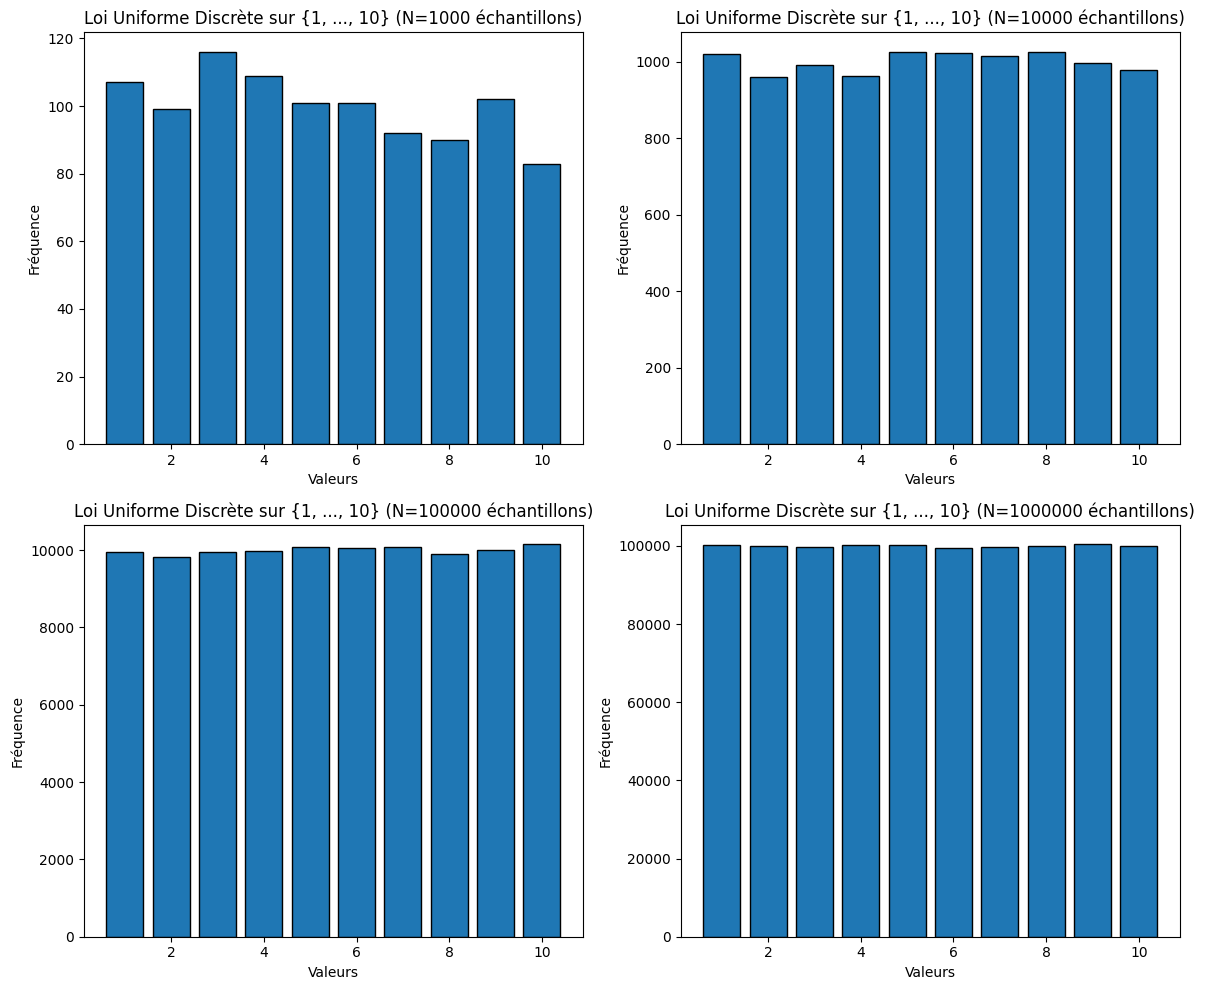

In [28]:
# Différentes valeurs de N
valeurs_N = [1000, 10000, 100000, 1000000]
# loi uniforme discrète sur {1, ..., 10} donc K = 10
K = 10

# Graphique
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, N in enumerate(valeurs_N):
    echantillons_discrets = uniforme_discrete(N, K)
    ax = axs[i//2, i%2]
    ax.hist(echantillons_discrets, bins=range(1, K+2), rwidth=0.8, align='left', edgecolor='black')
    ax.set_xlabel('Valeurs')
    ax.set_ylabel('Fréquence')
    ax.set_title(f'Loi Uniforme Discrète sur {{1, ..., {K}}} (N={N} échantillons)')

plt.tight_layout()
plt.savefig("img/loi-uniforme-discrete-sur-1-10.png")
plt.show()

On voit bien qu'à partir de $N$ échantillons de loi uniforme sur l'intervalle $[0,1]$, on a réussi à obtenir $N$ échantillon de loi uniforme discrète sur $\{1, ..., K\}$ (Dans notre exemple K = 10). 

De plus, plus N augmente, plus la précision de l'approximation de la loi uniforme discrète sur $\{1, ..., K\}$ est précise (la distribution des échantillons générés tend à se rapprocher davantage de la distribution théorique)

### Partie 2 - Méthode de la transformée inverse

Soit $X$ une variable aléatoire réelle de fonction de répartition $F$ (rappel : $F$ est une fonction croissante de $\mathbb{R}$ dans $[0,1]$, et "càdlàg", mais pas nécessairement bijective). On définit la **fonction inverse généralisée** $F^{-1}$ de $F$ par :
$$\forall~u \in [0,1], F^{-1}(u) = \inf\{x \in \mathbb{R}, F(x) \geq u\}.$$

Cette fonction conïncide avec l'inverse classique quand $F$ est bijective (attention même si $F$ est continue elle n'est pas nécessairement bijective, il peut y avoir des plateaux).

**Q1**. Montrer la proposition suivante :

Si $U$ suit la loi uniforme sur l'intervalle $[0,1]$, alors la v.a. $F^{-1}(U)$ a pour fonction de répartition $F$ (et donc la même loi que $X$).

Cela donne donc la méthode de la **transformée inverse** ; Si l'on connait explicitement la fonction $F^{-1}$, on peut simuler de n'importe quelle variable aléatoire à partir d'un échantillon de loi uniforme.

---- Votre réponse ici ----

**Q2**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi exponentielle de paramètre $\lambda$.

---- Votre réponse ici ----

In [ ]:
#####
### YOUR CODE HERE
#####

**Q3**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi de Cauchy (standard, i.e. $x_0 = 0, a = 1$).

---- Votre réponse ici ----

In [ ]:
#####
### YOUR CODE HERE
#####

**Q4**. Quelles sont les limitations de la méthode de la transformée inverse ?

---- Votre réponse ici ----

### Partie 3 - Transformation particulière : Méthode de Box-Müller

**Q1**. Soit $R \sim \text{Exp}(1/2)$ et $\Theta \sim U([0, 2 \pi])$ deux variables aléatoires indépendantes.

Montrer que $X = \sqrt{R} cos(\Theta)$ et $Y = \sqrt{R} sin(\Theta)$ sont deux variables indépendantes de loi $\mathcal{N}(0,1)$.

Cette méthode est connue comme la méthode de Box-Müller (1958), et est l'une des méthodes de référence pour générer des variables aléatoires normales.

**Démonstration** :

1. **Indépendance de $X$ et $Y$** :
   - Nous avons $X = \sqrt{R} \cos(\Theta)$ et $Y = \sqrt{R} \sin(\Theta)$.
   - Comme $R$ et $\Theta$ sont indépendants, les fonctions $\cos$ et $\sin$ sont des fonctions indépendantes de $R$ et $\Theta$.
   - Par conséquent, $X$ et $Y$ sont des fonctions indépendantes de $R$ et $\Theta$.
   

2. **Calcul de la distribution marginale de $X$ et $Y$** :
   - Puisque $R$ suit une distribution exponentielle de paramètre $1/2$, sa densité de probabilité est donnée par $f_R(r) = \frac{1}{2}e^{-r/2}$ pour $r > 0$.
   - $\Theta$ suit une distribution uniforme sur l'intervalle $[0, 2\pi]$, donc sa densité de probabilité est $f_\Theta(\theta) = \frac{1}{2\pi}$ pour $0 \leq \theta \leq 2\pi$.

3. **Transformation de $X$ et $Y$** :
   - On applique la transformation $X = \sqrt{R} \cos(\Theta)$ et $Y = \sqrt{R} \sin(\Theta)$.

4. **Calcul des densités marginales de $X$ et $Y$** :
   - Nous devons calculer les densités marginales de $X$ et $Y$ en utilisant la formule de changement de variable pour les densités de probabilité.

   - Pour $X$ :
     $
     f_X(x) = \frac{1}{4\pi}e^{-x^2/2}
     $
     où $r(x) = x^2$, $\theta(x) = \arccos\left(\frac{x}{\sqrt{x^2 + y^2}}\right)$, et $\left| \frac{d(r,\theta)}{d(x,y)} \right| = \frac{1}{\sqrt{x^2 + y^2}}$.

   - Pour $Y$ :
     $
     f_Y(y) = \frac{1}{4\pi}e^{-y^2/2}
     $
     où $r(y) = y^2$, $\theta(y) = \arcsin\left(\frac{y}{\sqrt{x^2 + y^2}}\right)$, et $\left| \frac{d(r,\theta)}{d(x,y)} \right| = \frac{1}{\sqrt{x^2 + y^2}}$.

5. **Conclusion** :
   - Les densités marginales de $X$ et $Y$ sont les densités de probabilité de la loi normale $\mathcal{N}(0, 1)$.
   
Ainsi, $X$ et $Y$ sont des variables aléatoires indépendantes suivant une loi normale $\mathcal{N}(0, 1)$. Cela confirme l'efficacité de la méthode de Box-Müller pour générer des variables aléatoires normales à partir de variables aléatoires exponentielles et uniformes.


**Q2**. En déduire une façon de générer un $N$ échantillons de loi normale $\mathcal{N}(0,1)$ à partir d'échantillons d'une loi uniforme sur l'intervalle $[0,1]$.

In [ ]:
#####
### YOUR CODE HERE
#####

**Q3**. À partir de $N$ échantillons de loi $\mathcal{N}(0,1)$, comment obtenir un $N$ échantillons de loi $\mathcal{N}(\mu, \sigma^2)$ ?

---- Votre réponse ici ----

In [ ]:
#####
### YOUR CODE HERE
#####

**Q4**. On s'intéresse maintenant à la simulation d'un **vecteur** gaussien en dimension $d$.

Expliquer pourquoi la méthode de Box-Müller permet de simuler des vecteurs de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$.

Soit $X \sim \mathcal{N_d}(\mathbf{0}_d, I_d)$, $\mathbf{m} \in \mathbb{R}^d$, et $\boldsymbol{\Sigma} \in \mathbb{R}^{d \times d}$ symétrique définie positive. On suppose qu'il existe $\mathbf{L} \in \mathbb{R}^{d \times d}$ tel que $\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}$. À l'aide des propriétés des vecteurs gaussiens, montrer que $Y = m + \mathbf{L}X \sim \mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$.

---- Votre réponse ici ----

**Q5**. On peut montrer qu'une telle matrice $\mathbf{L}$ existe toujours. C'est la **décomposition de Cholesky** ($\mathbf{L}$ est triangulaire inférieure), qui est fondamentale en statistique et *machine learning*. Elle tire son nom d'André-Louis Cholesky, ingénieur polytechnicien, mort pendant la première guerre mondiale (résultat publié de manière posthume en 1924). À noter que le coût de calcul de cette décomposition est $\mathcal{O}(d^3)$ !

À partir de $N$ échantillons de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$, générer $N$ échantillons de loi $\mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$. Prendre $d=2$ et utiliser $\texttt{np.linalg.cholesky}$.

In [ ]:
#####
### YOUR CODE HERE
#####